IMPORTS

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.neighbors import NearestNeighbors

FUNCTIONS 

In [27]:
def load_and_prepare_data(filepath):
    apples_df = pd.read_csv(filepath)

    apples_df = pd.get_dummies(apples_df)
    return apples_df

def standardize_data(df):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df.values)
    return X_scaled

def apply_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return dbscan, labels

def plot_clusters(X, labels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('DBSCAN Clustering Visualization')
    plt.colorbar(label='Cluster')
    plt.show()
    
def plot_k_distance_graph(X):
    neighbors = NearestNeighbors()
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors()
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]
    plt.figure(figsize=(10, 7))
    plt.plot(distances)
    plt.xlabel('Data Points')
    plt.ylabel('distance')
    plt.title('KNN-distance Graph')
    plt.show()



PREPROCESS DATA

In [28]:
# Load and prepare data
apples_df = load_and_prepare_data('../datasets/apple_quality_no_id.csv')

# Standardize the data
X_scaled = standardize_data(apples_df)

KNN DISTANCE GRRAPH

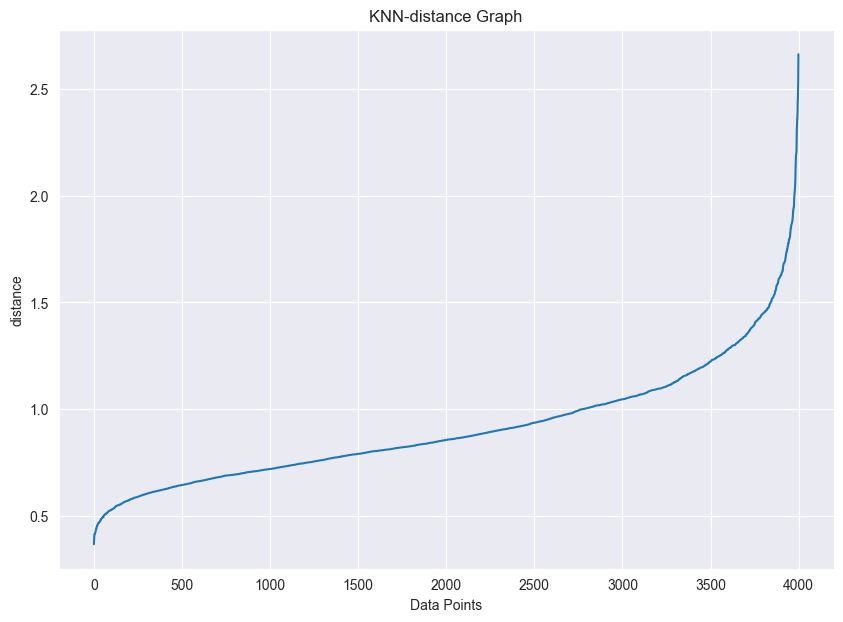

In [29]:
# Plot the knn distance graph
plot_k_distance_graph(X_scaled)

APPLY DBSCAN

In [30]:
eps = 2.5  # Epsilon parameter
min_samples = 3 # Minimum number of samples in a neighborhood

# Apply DBSCAN clustering
dbscan, labels = apply_dbscan(X_scaled, eps, min_samples)
apples_df['Cluster'] = labels

RESULTS

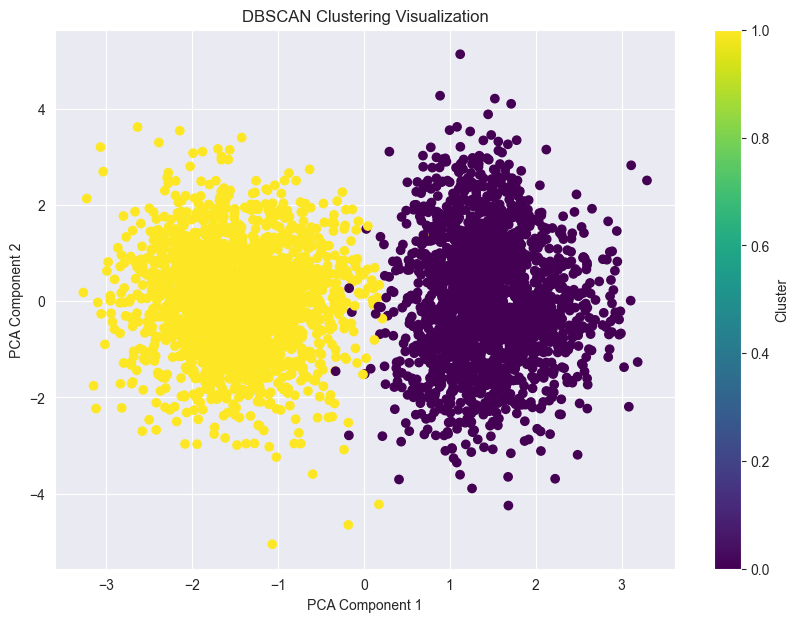

In [31]:
# Plot the clusters
plot_clusters(X_scaled, labels)